In [88]:
import pandas as pd
weather = pd.read_csv("WeatherMelbourne.csv", index_col="DATE")
weather

,STATION,NAME,DATN,WINDSPEED,HUMIDITY,RAINFALL,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,
1/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,43,55.0,0.0,0.05,59.0,68.0,47.0
2/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,26,50.0,1.2,0.00,66.0,76.0,48.0
3/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,20,67.0,0.0,0.00,65.0,87.0,56.0
4/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,20,51.0,0.0,0.09,57.0,66.0,51.0
5/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,28,50.0,0.0,0.03,57.0,64.0,52.0
...,...,...,...,...,...,...,...,...,...,...
4/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,19,83.0,3.4,0.02,60.0,64.0,45.0
5/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,13,84.0,0.0,0.01,63.0,NaN,54.0
6/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",NaN,9,99.0,0.2,0.00,57.0,74.0,NaN


In [89]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION      0.000000
NAME         0.000000
DATN         0.999778
WINDSPEED    0.000000
HUMIDITY     0.002108
RAINFALL     0.020195
PRCP         0.011318
TAVG         0.000444
TMAX         0.022747
TMIN         0.013427
dtype: float64

In [90]:
weather.apply(pd.isnull).sum()

STATION         0
NAME            0
DATN         9010
WINDSPEED       0
HUMIDITY       19
RAINFALL      182
PRCP          102
TAVG            4
TMAX          205
TMIN          121
dtype: int64

In [91]:
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'WINDSPEED', 'HUMIDITY', 'RAINFALL', 'PRCP', 'TAVG',
       'TMAX', 'TMIN'],
      dtype='object')

In [92]:
weather = weather[valid_columns].copy()
weather

,STATION,NAME,WINDSPEED,HUMIDITY,RAINFALL,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",43,55.0,0.0,0.05,59.0,68.0,47.0
2/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",26,50.0,1.2,0.00,66.0,76.0,48.0
3/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,65.0,87.0,56.0
4/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",20,51.0,0.0,0.09,57.0,66.0,51.0
5/1/2000,ASN00086282,"MELBOURNE AIRPORT, AS",28,50.0,0.0,0.03,57.0,64.0,52.0
...,...,...,...,...,...,...,...,...,...
4/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0
5/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,NaN,54.0
6/9/2024,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,NaN


In [99]:
weather.columns = weather.columns.str.lower()
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin
DATE,,,,,,,,,
2000-01-01,ASN00086282,"MELBOURNE AIRPORT, AS",43,55.0,0.0,0.05,59.0,68.0,47.0
2000-01-02,ASN00086282,"MELBOURNE AIRPORT, AS",26,50.0,1.2,0.00,66.0,76.0,48.0
2000-01-03,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,65.0,87.0,56.0
2000-01-04,ASN00086282,"MELBOURNE AIRPORT, AS",20,51.0,0.0,0.09,57.0,66.0,51.0
2000-01-05,ASN00086282,"MELBOURNE AIRPORT, AS",28,50.0,0.0,0.03,57.0,64.0,52.0
...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0


In [93]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

STATION      0
NAME         0
WINDSPEED    0
HUMIDITY     0
RAINFALL     0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [94]:
weather.index

Index(['1/1/2000', '2/1/2000', '3/1/2000', '4/1/2000', '5/1/2000', '6/1/2000',
       '7/1/2000', '8/1/2000', '9/1/2000', '10/1/2000',
       ...
       '30/8/2024', '31/8/2024', '1/9/2024', '2/9/2024', '3/9/2024',
       '4/9/2024', '5/9/2024', '6/9/2024', '7/9/2024', '8/9/2024'],
      dtype='object', name='DATE', length=9012)

In [95]:
weather.index = pd.to_datetime(weather.index, format='%d/%m/%Y')
weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-07', '2024-09-08'],
              dtype='datetime64[ns]', name='DATE', length=9012, freq=None)

In [96]:
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    246
Name: count, dtype: int64

<Axes: xlabel='DATE'>

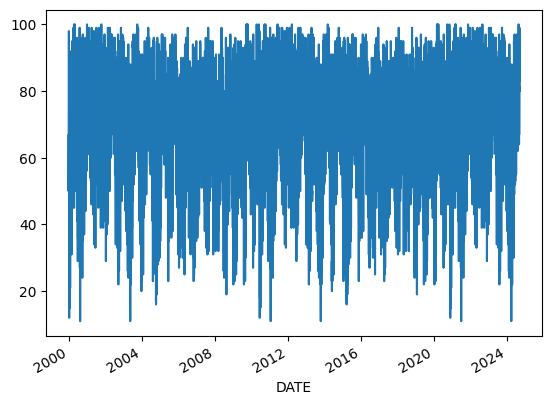

In [100]:
weather["humidity"].plot()

In [102]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target
DATE,,,,,,,,,,
2000-01-01,ASN00086282,"MELBOURNE AIRPORT, AS",43,55.0,0.0,0.05,59.0,68.0,47.0,76.0
2000-01-02,ASN00086282,"MELBOURNE AIRPORT, AS",26,50.0,1.2,0.00,66.0,76.0,48.0,87.0
2000-01-03,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,65.0,87.0,56.0,66.0
2000-01-04,ASN00086282,"MELBOURNE AIRPORT, AS",20,51.0,0.0,0.09,57.0,66.0,51.0,64.0
2000-01-05,ASN00086282,"MELBOURNE AIRPORT, AS",28,50.0,0.0,0.03,57.0,64.0,52.0,70.0
...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0


In [104]:
weather = weather.ffill()
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target
DATE,,,,,,,,,,
2000-01-01,ASN00086282,"MELBOURNE AIRPORT, AS",43,55.0,0.0,0.05,59.0,68.0,47.0,76.0
2000-01-02,ASN00086282,"MELBOURNE AIRPORT, AS",26,50.0,1.2,0.00,66.0,76.0,48.0,87.0
2000-01-03,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,65.0,87.0,56.0,66.0
2000-01-04,ASN00086282,"MELBOURNE AIRPORT, AS",20,51.0,0.0,0.09,57.0,66.0,51.0,64.0
2000-01-05,ASN00086282,"MELBOURNE AIRPORT, AS",28,50.0,0.0,0.03,57.0,64.0,52.0,70.0
...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0


In [106]:
numeric_weather = weather.select_dtypes(include=[float, int])
correlation_matrix = numeric_weather.corr()
correlation_matrix

,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target
windspeed,1.000000,-0.130182,0.011805,-0.021024,-0.009137,-0.007178,-0.000046,-0.001543
humidity,-0.130182,1.000000,0.082076,-0.001761,-0.010204,-0.007087,-0.002898,-0.009056
rainfall,0.011805,0.082076,1.000000,-0.019801,0.008786,0.006037,0.013353,-0.001819
prcp,-0.021024,-0.001761,-0.019801,1.000000,-0.089161,-0.124663,0.045533,-0.093613
tavg,-0.009137,-0.010204,0.008786,-0.089161,1.000000,0.940752,0.702201,0.784102
tmax,-0.007178,-0.007087,0.006037,-0.124663,0.940752,1.000000,0.685432,0.754782
tmin,-0.000046,-0.002898,0.013353,0.045533,0.702201,0.685432,1.000000,0.533996
target,-0.001543,-0.009056,-0.001819,-0.093613,0.784102,0.754782,0.533996,1.000000


In [111]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [112]:
predictors = weather.columns[~weather.columns.isin(["target","name", "station"])]
predictors

Index(['windspeed', 'humidity', 'rainfall', 'prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [116]:
def backtest(weather, model, predictors, start = 3650, step =90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i: (i+step), :]
        
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index = test.index)
        combined = pd.concat([test["target"], preds], axis = 1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [117]:
predictions = backtest(weather,rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2009-12-29,98.0,77.813030,20.186970
2009-12-30,97.0,97.770753,0.770753
2009-12-31,66.0,90.827232,24.827232
2010-01-01,68.0,71.088182,3.088182
2010-01-02,67.0,68.965601,1.965601
...,...,...,...
2024-09-04,64.0,69.631508,5.631508
2024-09-05,74.0,71.759117,2.240883
2024-09-06,67.0,68.053733,1.053733


In [120]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])


np.float64(5.446596940870511)

In [121]:
predictions["diff"].mean()

np.float64(5.446596940870511)

In [122]:
def pct_diff(old,new):
    return (new - old)/old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [123]:
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,ASN00086282,"MELBOURNE AIRPORT, AS",43,55.0,0.0,0.05,59.0,68.0,47.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,ASN00086282,"MELBOURNE AIRPORT, AS",26,50.0,1.2,0.00,66.0,76.0,48.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,65.0,87.0,56.0,66.0,...,50.333333,0.112583,0.016667,-1.00,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,ASN00086282,"MELBOURNE AIRPORT, AS",20,51.0,0.0,0.09,57.0,66.0,51.0,64.0,...,51.666667,-0.012903,0.030000,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,ASN00086282,"MELBOURNE AIRPORT, AS",28,50.0,0.0,0.03,57.0,64.0,52.0,70.0,...,53.000000,-0.018868,0.040000,-0.25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0,...,46.333333,-0.028777,0.016667,0.20,65.642857,-0.025027,48.500000,-0.072165,0.047857,-0.582090
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0,...,47.000000,0.148936,0.010000,0.00,65.214286,-0.018620,48.928571,0.103650,0.048571,-0.794118
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0,...,51.000000,0.058824,0.010000,-1.00,65.500000,0.129771,49.428571,0.092486,0.043571,-1.000000


In [124]:
weather = weather.iloc[14:,:]
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,70.0,84.0,63.0,67.0,...,62.000000,0.016129,0.000000,NaN,81.785714,0.027074,56.285714,0.119289,0.010714,-1.000000
2000-01-16,ASN00086282,"MELBOURNE AIRPORT, AS",22,22.0,0.0,0.00,60.0,67.0,64.0,83.0,...,63.000000,0.015873,0.000000,NaN,81.142857,-0.174296,57.428571,0.114428,0.010714,-1.000000
2000-01-17,ASN00086282,"MELBOURNE AIRPORT, AS",37,18.0,0.0,0.03,70.0,83.0,49.0,94.0,...,58.666667,-0.164773,0.010000,2.0,80.857143,0.026502,56.928571,-0.139272,0.012857,1.333333
2000-01-18,ASN00086282,"MELBOURNE AIRPORT, AS",24,73.0,0.0,0.00,78.0,94.0,57.0,79.0,...,56.666667,0.005882,0.010000,-1.0,82.857143,0.134483,57.357143,-0.006227,0.006429,-1.000000
2000-01-19,ASN00086282,"MELBOURNE AIRPORT, AS",46,57.0,0.0,0.00,69.0,79.0,63.0,82.0,...,56.333333,0.118343,0.010000,-1.0,83.928571,-0.058723,58.142857,0.083538,0.004286,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0,...,46.333333,-0.028777,0.016667,0.2,65.642857,-0.025027,48.500000,-0.072165,0.047857,-0.582090
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0,...,47.000000,0.148936,0.010000,0.0,65.214286,-0.018620,48.928571,0.103650,0.048571,-0.794118
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0,...,51.000000,0.058824,0.010000,-1.0,65.500000,0.129771,49.428571,0.092486,0.043571,-1.000000


In [126]:
weather = weather.fillna(0)
weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,70.0,84.0,63.0,67.0,...,62.000000,0.016129,0.000000,0.0,81.785714,0.027074,56.285714,0.119289,0.010714,-1.000000
2000-01-16,ASN00086282,"MELBOURNE AIRPORT, AS",22,22.0,0.0,0.00,60.0,67.0,64.0,83.0,...,63.000000,0.015873,0.000000,0.0,81.142857,-0.174296,57.428571,0.114428,0.010714,-1.000000
2000-01-17,ASN00086282,"MELBOURNE AIRPORT, AS",37,18.0,0.0,0.03,70.0,83.0,49.0,94.0,...,58.666667,-0.164773,0.010000,2.0,80.857143,0.026502,56.928571,-0.139272,0.012857,1.333333
2000-01-18,ASN00086282,"MELBOURNE AIRPORT, AS",24,73.0,0.0,0.00,78.0,94.0,57.0,79.0,...,56.666667,0.005882,0.010000,-1.0,82.857143,0.134483,57.357143,-0.006227,0.006429,-1.000000
2000-01-19,ASN00086282,"MELBOURNE AIRPORT, AS",46,57.0,0.0,0.00,69.0,79.0,63.0,82.0,...,56.333333,0.118343,0.010000,-1.0,83.928571,-0.058723,58.142857,0.083538,0.004286,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0,...,46.333333,-0.028777,0.016667,0.2,65.642857,-0.025027,48.500000,-0.072165,0.047857,-0.582090
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0,...,47.000000,0.148936,0.010000,0.0,65.214286,-0.018620,48.928571,0.103650,0.048571,-0.794118
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0,...,51.000000,0.058824,0.010000,-1.0,65.500000,0.129771,49.428571,0.092486,0.043571,-1.000000


In [130]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_AVG_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target,...,rolling_14_prcp_pct,month_avg_tmax,dY_AVG_tmax,month_avg_tmin,dY_AVG_tmin,month_avg_prcp,dY_AVG_prcp,day_AVG_tmax,day_AVG_tmin,day_AVG_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,ASN00086282,"MELBOURNE AIRPORT, AS",20,67.0,0.0,0.00,70.0,84.0,63.0,67.0,...,-1.000000,84.000000,84.00,63.000000,63.00,0.000000,0.0000,84.00,63.00,0.0000
2000-01-16,ASN00086282,"MELBOURNE AIRPORT, AS",22,22.0,0.0,0.00,60.0,67.0,64.0,83.0,...,-1.000000,75.500000,67.00,63.500000,64.00,0.000000,0.0000,67.00,64.00,0.0000
2000-01-17,ASN00086282,"MELBOURNE AIRPORT, AS",37,18.0,0.0,0.03,70.0,83.0,49.0,94.0,...,1.333333,78.000000,83.00,58.666667,49.00,0.010000,0.0300,83.00,49.00,0.0300
2000-01-18,ASN00086282,"MELBOURNE AIRPORT, AS",24,73.0,0.0,0.00,78.0,94.0,57.0,79.0,...,-1.000000,82.000000,94.00,58.250000,57.00,0.007500,0.0000,94.00,57.00,0.0000
2000-01-19,ASN00086282,"MELBOURNE AIRPORT, AS",46,57.0,0.0,0.00,69.0,79.0,63.0,82.0,...,-1.000000,81.400000,79.00,59.200000,63.00,0.006000,0.0000,79.00,63.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04,ASN00086282,"MELBOURNE AIRPORT, AS",19,83.0,3.4,0.02,60.0,64.0,45.0,64.0,...,-0.582090,63.698895,62.28,45.139503,42.60,0.052735,0.0492,62.28,42.60,0.0492
2024-09-05,ASN00086282,"MELBOURNE AIRPORT, AS",13,84.0,0.0,0.01,63.0,64.0,54.0,74.0,...,-0.794118,63.699310,61.88,45.151724,44.20,0.052676,0.0348,61.88,44.20,0.0348
2024-09-06,ASN00086282,"MELBOURNE AIRPORT, AS",9,99.0,0.2,0.00,57.0,74.0,54.0,67.0,...,-1.000000,63.713499,62.60,45.163912,43.32,0.052603,0.0480,62.60,43.32,0.0480


In [131]:
predictors = weather.columns[~weather.columns.isin(["target","name", "station"])]
predictors

Index(['windspeed', 'humidity', 'rainfall', 'prcp', 'tavg', 'tmax', 'tmin',
       'rolling_3_tmax', 'rolling_3_tmax_pct', 'rolling_3_tmin',
       'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin',
       'rolling_14_tmin_pct', 'rolling_14_prcp', 'rolling_14_prcp_pct',
       'month_avg_tmax', 'dY_AVG_tmax', 'month_avg_tmin', 'dY_AVG_tmin',
       'month_avg_prcp', 'dY_AVG_prcp', 'day_AVG_tmax', 'day_AVG_tmin',
       'day_AVG_prcp'],
      dtype='object')

In [132]:
predictions = backtest(weather,rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2010-01-12,69.0,76.145760,7.145760
2010-01-13,71.0,78.229219,7.229219
2010-01-14,80.0,78.029530,1.970470
2010-01-15,93.0,82.792597,10.207403
2010-01-16,70.0,80.378342,10.378342
...,...,...,...
2024-09-04,64.0,68.987749,4.987749
2024-09-05,74.0,68.850178,5.149822
2024-09-06,67.0,65.103252,1.896748


In [134]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

np.float64(4.9767796265616635)

In [135]:
predictions.sort_values("diff", ascending = False)

,actual,prediction,diff
DATE,,,
2019-12-19,112.0,78.978761,33.021239
2016-01-12,110.0,80.911544,29.088456
2014-02-07,108.0,80.123680,27.876320
2010-12-30,105.0,77.539836,27.460164
2019-12-20,69.0,95.707576,26.707576
...,...,...,...
2013-08-23,60.0,59.992020,0.007980
2016-07-10,58.0,57.992164,0.007836
2011-06-27,58.0,57.993581,0.006419


In [136]:
weather.loc["2019-12-10":"2019-12-25"]

,station,name,windspeed,humidity,rainfall,prcp,tavg,tmax,tmin,target,...,rolling_14_prcp_pct,month_avg_tmax,dY_AVG_tmax,month_avg_tmin,dY_AVG_tmin,month_avg_prcp,dY_AVG_prcp,day_AVG_tmax,day_AVG_tmin,day_AVG_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-10,ASN00086282,"MELBOURNE AIRPORT, AS",28,62.0,0.0,0.01,58.0,65.0,55.0,69.0,...,-0.840909,77.575960,73.30,54.307179,54.45,0.069716,0.0240,73.30,54.45,0.0240
2019-12-11,ASN00086282,"MELBOURNE AIRPORT, AS",17,70.0,0.0,0.00,59.0,69.0,53.0,69.0,...,-1.000000,77.561667,72.00,54.305000,52.20,0.069600,0.0835,72.00,52.20,0.0835
2019-12-12,ASN00086282,"MELBOURNE AIRPORT, AS",24,66.0,0.0,0.00,57.0,69.0,54.0,72.0,...,-1.000000,77.547421,75.00,54.304493,52.50,0.069484,0.0165,75.00,52.50,0.0165
2019-12-13,ASN00086282,"MELBOURNE AIRPORT, AS",39,63.0,1.4,0.00,62.0,72.0,47.0,72.0,...,-1.000000,77.538206,77.60,54.292359,52.15,0.069369,0.0595,77.60,52.15,0.0595
2019-12-14,ASN00086282,"MELBOURNE AIRPORT, AS",28,68.0,0.0,0.00,62.0,72.0,56.0,75.0,...,-1.000000,77.529022,77.40,54.295191,57.30,0.069254,0.1200,77.40,57.30,0.1200
2019-12-15,ASN00086282,"MELBOURNE AIRPORT, AS",33,44.0,0.0,0.00,62.0,75.0,56.0,74.0,...,-1.000000,77.524834,75.35,54.298013,54.50,0.069139,0.1435,75.35,54.50,0.1435
2019-12-16,ASN00086282,"MELBOURNE AIRPORT, AS",33,70.0,0.0,0.00,62.0,74.0,49.0,87.0,...,-1.000000,77.519008,76.15,54.289256,54.50,0.069025,0.0230,76.15,54.50,0.0230
2019-12-17,ASN00086282,"MELBOURNE AIRPORT, AS",35,61.0,0.0,0.00,74.0,87.0,49.0,106.0,...,-1.000000,77.534653,78.55,54.280528,53.75,0.068911,0.0025,78.55,53.75,0.0025
2019-12-18,ASN00086282,"MELBOURNE AIRPORT, AS",11,58.0,0.0,0.00,83.0,106.0,56.0,79.0,...,-1.000000,77.581549,80.50,54.283361,54.45,0.068797,0.0355,80.50,54.45,0.0355


In [138]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     379
1.0     770
2.0     695
3.0     611
4.0     523
5.0     465
6.0     384
7.0     337
8.0     280
9.0     189
10.0    171
11.0    126
12.0     87
13.0     74
14.0     56
15.0     47
16.0     36
17.0     30
18.0     19
19.0     15
20.0     12
21.0     13
22.0      6
23.0      5
24.0      9
25.0      3
26.0      1
27.0      2
28.0      1
29.0      1
33.0      1
Name: count, dtype: int64

<Axes: xlabel='diff'>

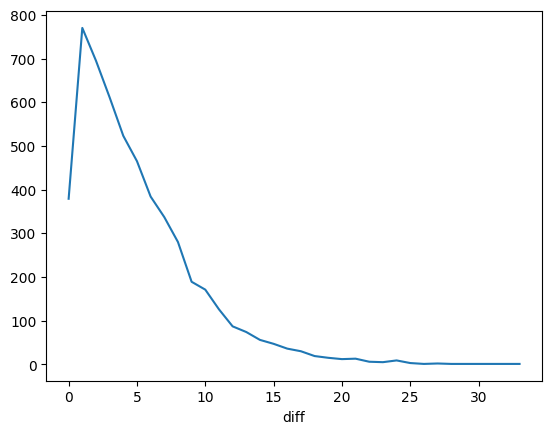

In [139]:
predictions["diff"].round().value_counts().sort_index().plot()